**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from datetime import datetime
import joblib


**Load Dataset**

In [2]:
df = pd.read_csv('FastagFraudDetection.csv')

# 1. Data Exploration

In [3]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

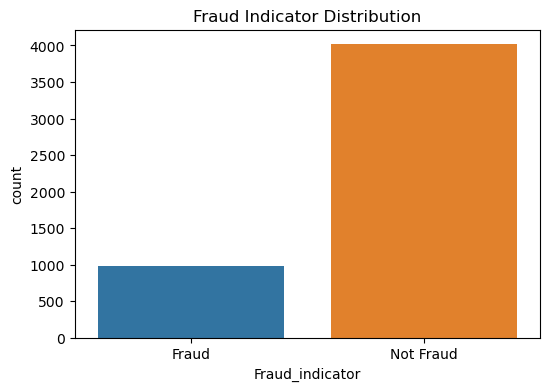

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Fraud Indicator Distribution')
plt.show()

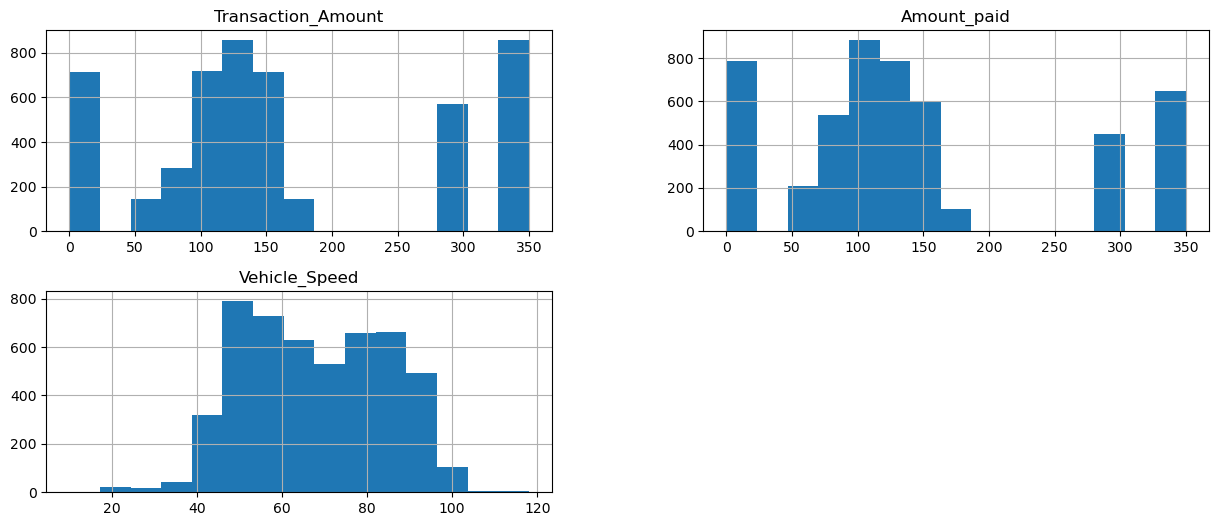

In [8]:
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features].hist(bins=15,figsize=(15,6),layout=(2,2))
plt.show()

# 2. Feature Engineering

In [9]:
# Handle missing values - drop rows with missing target or critical features
df.dropna(subset=['Fraud_indicator'], inplace=True)


In [10]:
# Fill missing values for categorical features with a placeholder
df['Vehicle_Type'].fillna('Unknown', inplace=True)
df['Lane_Type'].fillna('Unknown', inplace=True)
df['Vehicle_Dimensions'].fillna('Unknown', inplace=True)
df['FastagID'].fillna('Unknown', inplace=True)
df['TollBoothID'].fillna('Unknown', inplace=True)

In [11]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'FastagID', 'TollBoothID'], drop_first=True)


In [12]:
# Convert Timestamp to datetime and extract useful features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek


In [13]:
# Convert Fraud_indicator to binary
df['Fraud_indicator'] = df['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})

In [14]:
# Split Geographical_Location into Latitude and Longitude
df[['Latitude', 'Longitude']] = df['Geographical_Location'].str.split(',', expand=True).astype(float)


In [15]:
# Drop unnecessary columns
df.drop(columns=['Transaction_ID', 'Timestamp', 'Geographical_Location', 'Vehicle_Plate_Number'], inplace=True)

# 3. Model Development

In [16]:
X = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
#Save model
joblib.dump(model, 'fastag_fraud_detection_model.joblib')

['fastag_fraud_detection_model.joblib']

In [20]:
# Make predictions
y_pred = model.predict(X_test)


In [21]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

[[803   0]
 [ 49 148]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       803
           1       1.00      0.75      0.86       197

    accuracy                           0.95      1000
   macro avg       0.97      0.88      0.91      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy: 0.951
Precision: 1.0
Recall: 0.751269035532995
F1 Score: 0.8579710144927536


# 4. Explanatory Analysis

                       Feature  Importance
1                  Amount_paid    0.290552
0           Transaction_Amount    0.054584
2                Vehicle_Speed    0.031733
4469                       Day    0.029835
4468                      Hour    0.027078
...                        ...         ...
2970  FastagID_FTG-527-HGT-109    0.000000
2961  FastagID_FTG-524-CDE-092    0.000000
2960  FastagID_FTG-523-NMK-322    0.000000
2958  FastagID_FTG-523-JKL-678    0.000000
2241  FastagID_FTG-379-HIJ-012    0.000000

[4474 rows x 2 columns]


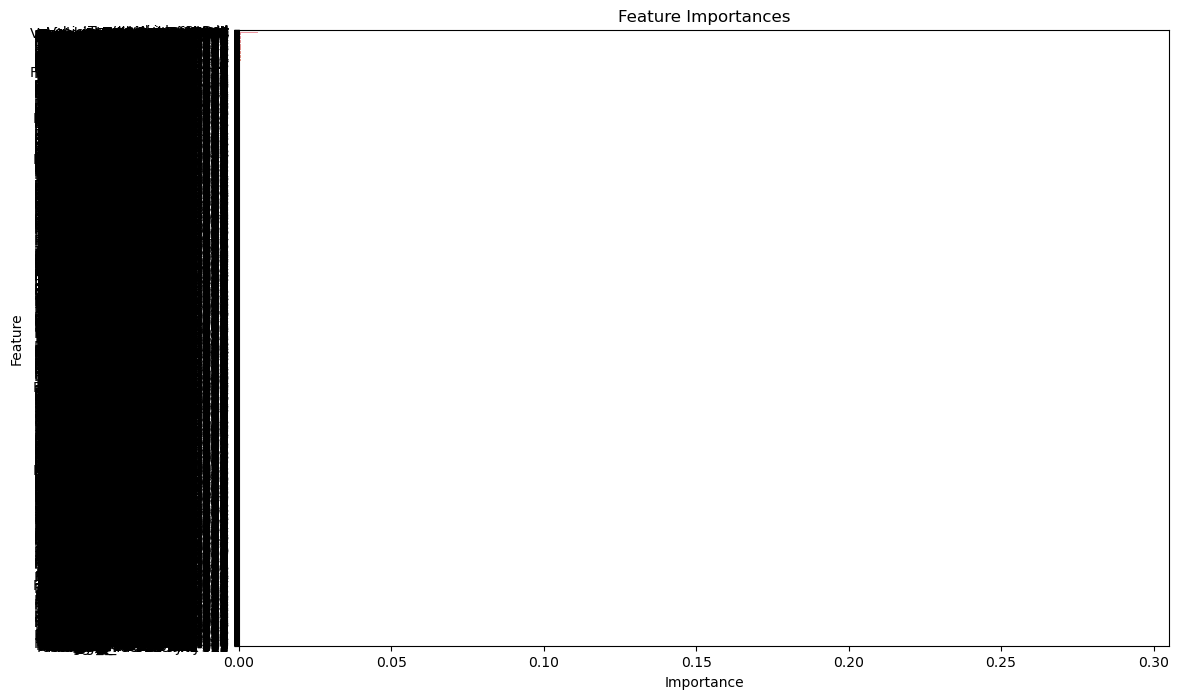

In [22]:
# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


# 5. Real-time Fraud Detection

In [23]:
input_data = {
    'Transaction_Amount': 120,
    'Amount_paid': 120,
    'Vehicle_Speed': 60,
    'Hour': 10,
    'Day': 20,
    'Month': 6,
    'Day_of_Week': 4,  # Thursday
    'Latitude': 13.059816123454882,
    'Longitude': 77.77068662374292,
    'Vehicle_Type_Car': 1,
    'Vehicle_Type_Motorcycle': 0,
    'Vehicle_Type_SUV': 0,
    'Vehicle_Type_Sedan': 0,
    'Vehicle_Type_Truck': 0,
    'Vehicle_Type_Van': 0,
    'Vehicle_Type_Bus': 0,
    'Vehicle_Type_Unknown': 0,
    'Lane_Type_Express': 0,
    'Lane_Type_Regular': 1,
    'Lane_Type_Unknown': 0,
    'Vehicle_Dimensions_Large': 0,
    'Vehicle_Dimensions_Medium': 0,
    'Vehicle_Dimensions_Small': 1,
    'Vehicle_Dimensions_Unknown': 0,
    'FastagID_FTG-999-XYZ-123': 1,  # assuming this FastagID is present in data, otherwise use 'FastagID_Unknown': 1
    'TollBoothID_A-102': 1,
    'TollBoothID_Unknown': 0
}



In [24]:
sample_df = pd.DataFrame([input_data])

sample_df = sample_df.reindex(columns=X_train.columns, fill_value=0)

sample_prediction = model.predict(sample_df)

In [25]:
print("Prediction:", "Fraud" if sample_prediction[0] == 1 else "Not Fraud")

Prediction: Not Fraud


#Deployment using FastAPI

In [22]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [26]:
from fastapi import FastAPI
from pydantic import BaseModel

In [27]:
model = joblib.load('fastag_fraud_detection_model.joblib')

app = FastAPI()

In [28]:
class FastagTransaction(BaseModel):
    Transaction_Amount: float
    Amount_paid: float
    Vehicle_Speed: float
    Hour: int
    Day: int
    Month: int
    Day_of_Week: int
    Latitude: float
    Longitude: float
    Vehicle_Type_Car: int
    Vehicle_Type_Motorcycle: int
    Vehicle_Type_SUV: int
    Vehicle_Type_Sedan: int
    Vehicle_Type_Truck: int
    Vehicle_Type_Van: int
    Vehicle_Type_Bus: int
    Vehicle_Type_Unknown: int
    Lane_Type_Express: int
    Lane_Type_Regular: int
    Lane_Type_Unknown: int
    Vehicle_Dimensions_Large: int
    Vehicle_Dimensions_Medium: int
    Vehicle_Dimensions_Small: int
    Vehicle_Dimensions_Unknown: int
    FastagID_FTG_999_XYZ_123: int
    TollBoothID_A_102: int
    TollBoothID_Unknown: int


In [29]:
@app.post("/predict")
def predict(transaction: FastagTransaction):
    input_data = pd.DataFrame([transaction.dict()])

    input_data = input_data.reindex(columns=model.feature_names_in_, fill_value=0)

    prediction = model.predict(input_data)

    return {"prediction": "Fraud" if prediction[0] == 1 else "Not Fraud"}

In [ ]:
!uvicorn app:app --reload

INFO:     Will watch for changes in these directories: ['/home/thenumansabir/This PC/3-WorkSpace/Mentorness ML Internship/My Solutions/Fast Tag Fraud detection']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [42850] using StatReload
ERROR:    Error loading ASGI app. Could not import module "app".
